In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## import the data
data = pd.read_csv("C:/Users\Rohan R Shetty/Downloads/Iris.csv.xls")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
#x = data.iloc[:,1:5].values
y = data['Species'].values
#y = data.iloc[:,-1].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [27]:
#### Split the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
### Calculate the value of K
k = int((np.sqrt(len(xtrain)))/2)
if k%2 == 0:
  k = (k+1)

In [10]:
k

5

In [11]:
#### Build the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = k)

In [12]:
### Train the model
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [25]:
### Prediction
ypred = model.predict(xtest)
ypred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [14]:
ytest

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [15]:
df = pd.DataFrame()
df["Actual Values"] = ytest
df["Predicted Values"] = ypred
df

,Actual Values,Predicted Values
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [26]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(ytest,ypred)
accu

0.9666666666666667

In [17]:
error=0
for i in range(len(ypred)):
  if ypred[i] != ytest[i]:
    error=error+1
error

1

In [18]:
correct=0
for i in range(len(ypred)):
  if ypred[i] == ytest[i]:
    correct=correct+1
correct

29

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [20]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [21]:
ytrain

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris

In [32]:
accuracy = []
error = []
for k in range(1,50):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  accu = accuracy_score(ytest,ypred)
  accuracy.append(accu)
  error.append(1-accu)

NameError: name 'accuracy' is not defined

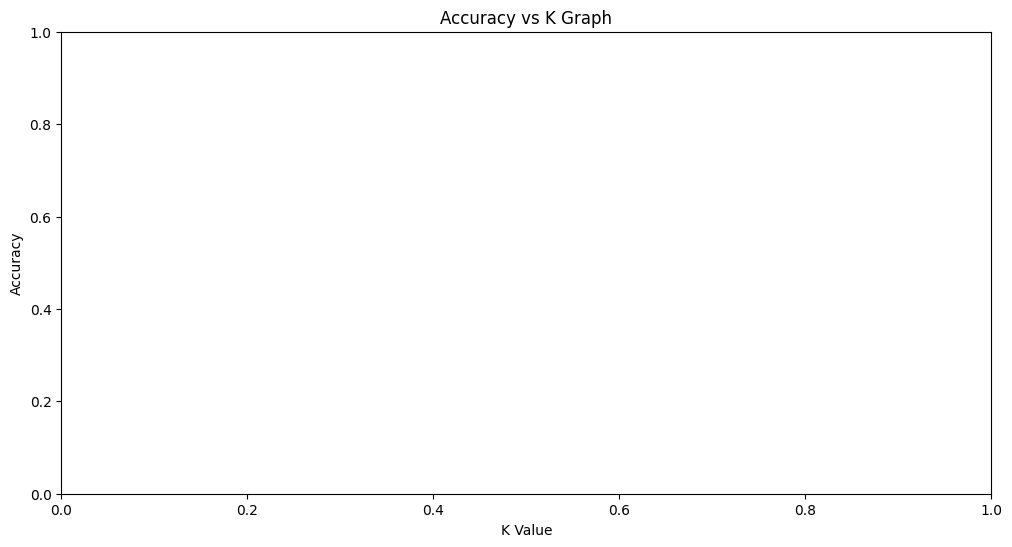

In [28]:
plt.figure(figsize=(12,6))
plt.title("Accuracy vs K Graph")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.plot(range(1,50),accuracy,linestyle='dashed',marker='o',markerfacecolor='green')
plt.show()

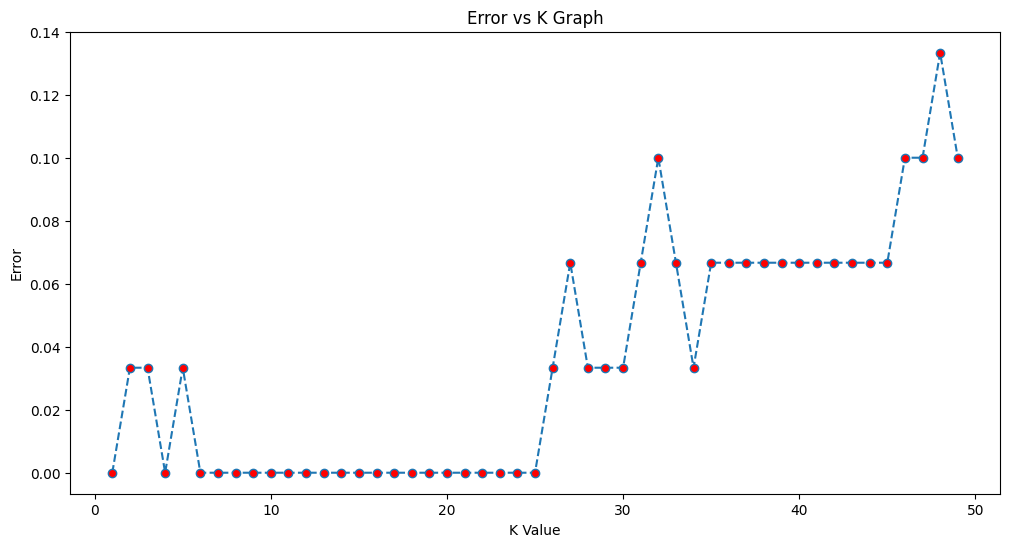

In [34]:
plt.figure(figsize=(12,6))
plt.title("Error vs K Graph")
plt.xlabel("K Value")
plt.ylabel("Error")
plt.plot(range(1,50),error,linestyle='dashed',marker='o',markerfacecolor='red')
plt.show()

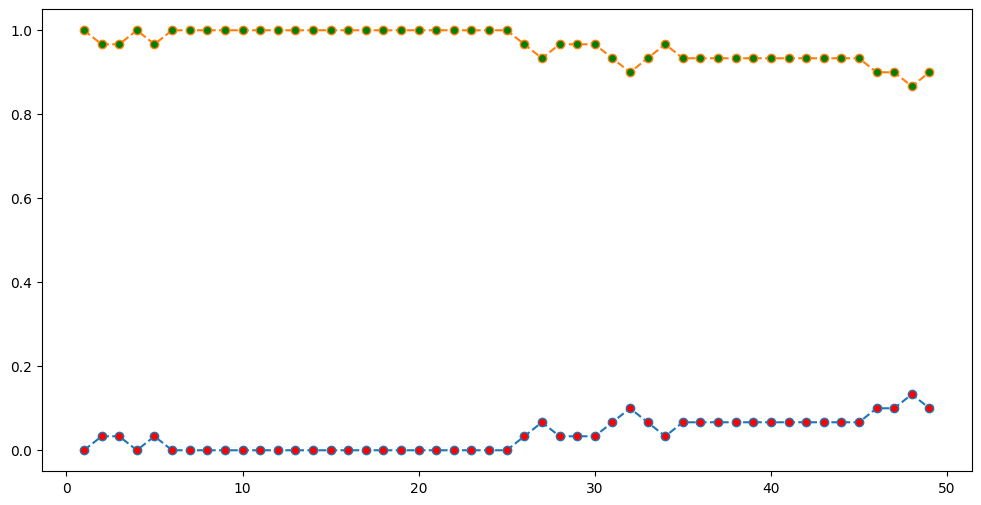

In [35]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error,linestyle='dashed',marker='o',markerfacecolor='red')
plt.plot(range(1,50),accuracy,linestyle='dashed',marker='o',markerfacecolor='green')
plt.show()

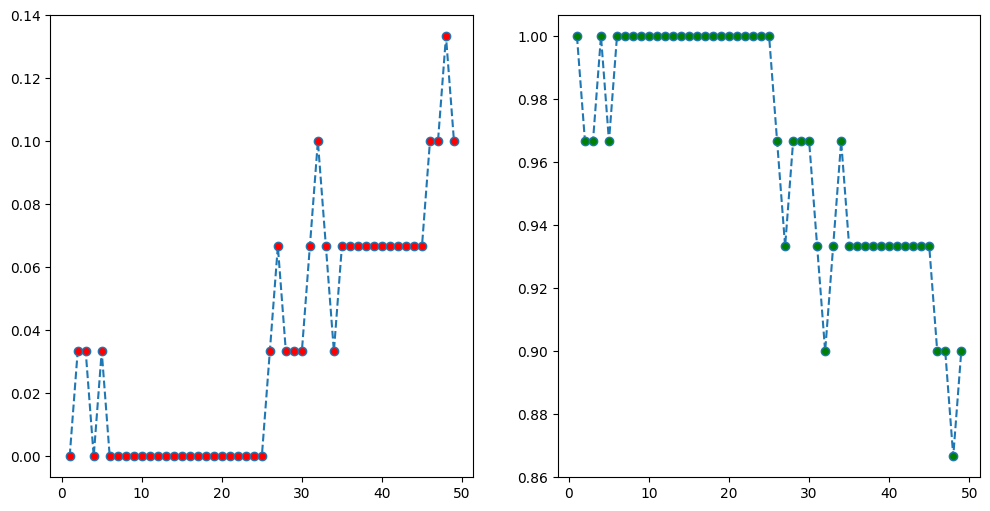

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(1,50),error,linestyle='dashed',marker='o',markerfacecolor='red')
plt.subplot(1,2,2)
plt.plot(range(1,50),accuracy,linestyle='dashed',marker='o',markerfacecolor='green')
plt.show()